In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import missingno as msno 
import scipy
from scipy.sparse import hstack
from PIL import Image
from wordcloud import WordCloud#, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/506 middle/solutoion/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/506 middle/solutoion/input/sample.csv
/content/drive/MyDrive/506 middle/solutoion/input/train.csv
/content/drive/MyDrive/506 middle/solutoion/input/test.csv
/content/drive/MyDrive/506 middle/solutoion/input/X_test.csv
/content/drive/MyDrive/506 middle/solutoion/input/X_train.csv


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/506 middle/solutoion/input/X_train.csv')

In [ ]:
data.head()

,Unnamed: 0,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,sentiment,sum_sentiment
0,0,1049849,B000MR9D5E,A1EKSETIBS9ETQ,0,0,1198281600,"Great nature series, but not all scenes looked...",I have watched numbers of nature shows and ser...,4.0,"(0.18641098484848484, 0.47947180134680134)","(0.8, 0.75)"
1,1,999834,B000GAKFIG,AR0HFYHYHDGQQ,2,5,1245024000,Agatha Christie's Marple: Series 2,As a devoted fan of all of Agatha Christie's f...,5.0,"(0.039999999999999994, 0.5900000000000001)","(0.0, 0.0)"
2,2,218826,6300215776,A37S3ACL57LN62,11,15,1126137600,Childish Entertainment,This movie is about a script writer and a secr...,2.0,"(0.06977101845522897, 0.5195374800637957)","(-0.2, 0.8)"
3,3,796384,B00019071C,A1TO1P3NV7OAU6,2,2,1351036800,The weakest Babylon 5 season,This is the weakest Babylon 5 season. After wi...,4.0,"(0.04166666666666667, 0.5989583333333334)","(0.0, 0.0)"
4,4,1219784,B001NFNFN0,ATCM1W7HWIC6U,0,0,1381708800,Versatile and effective,This video will always have a sweet spot on my...,5.0,"(0.21763227513227515, 0.5386904761904763)","(0.6, 0.8)"


In [ ]:
print('There are', str(data.shape[0]), 'records in total.')

There are 139753 records in total.


In [ ]:
STOPWORDS=['i', "i've", "ive", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "youre",
                  "you've", "youve", "you'll", "you'd", "youll", "youd", 'your', 'yours', 'yourself',
                  'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", "shes", 'her', 'hers', 'herself', 'it',
                  "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',
                  'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", "thatll", 'these', 'those',
                  'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
                  'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
                  'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
                  'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
                  'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
                  'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
                  'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
                  'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
                  'can', 'will', 'just', 'don', "don't", "dont", 'should', "should've", "shouldve",
                  'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", "arent", 'couldn', "couldn't",
                  "couldnt", 'didn', "didn't", "didnt", 'doesn', "doesn't", "doesnt", 'hadn', "hadn't", "hadnt", 'hasn',
                  "hasn't", "hasnt", 'haven', "haven't", "havent", 'isn', "isn't", "isnt", 'ma', 'mightn', "mightn't",
                  "mightnt", 'mustn', "mustn't", "mustnt", 'needn', "needn't", "neednt", 'shan', "shan't", "shant",
                  'shouldn', "shouldn't", "shouldnt",
                  'wasn', "wasn't", "wasnt", 'weren', "weren't", "werent", 'won', "won't", "wont", 'wouldn', "wouldn't",
                  "wouldnt","two","movie","film","one"]

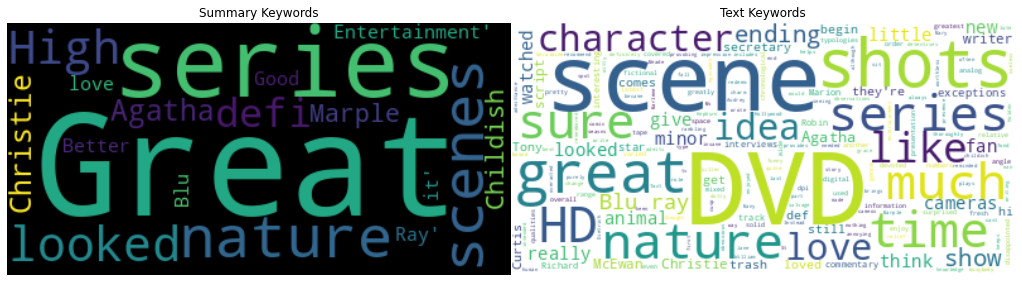

In [ ]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(121)
text = data.Summary.values
wordcloud = WordCloud(
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
plt.title('Summary Keywords')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

ax = fig.add_subplot(122)
text = data.Text.values
wordcloud = WordCloud(
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
plt.title('Text Keywords')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

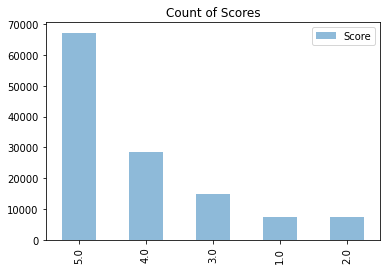

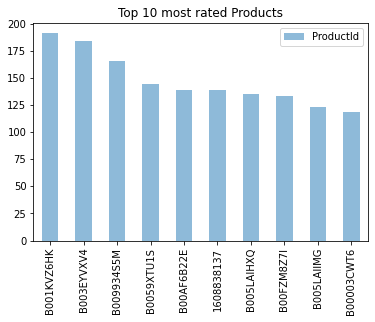

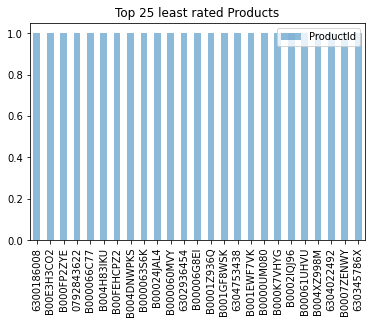

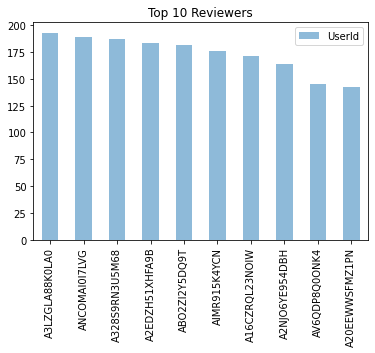

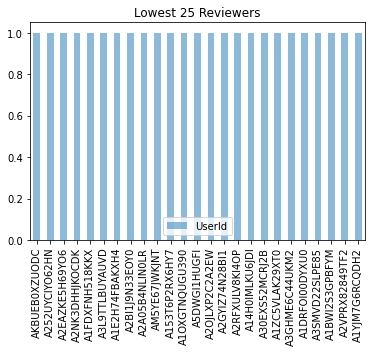

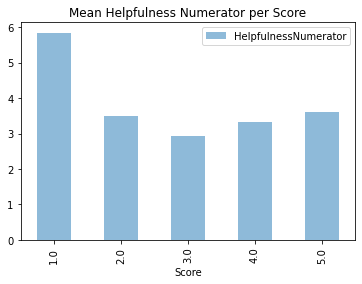

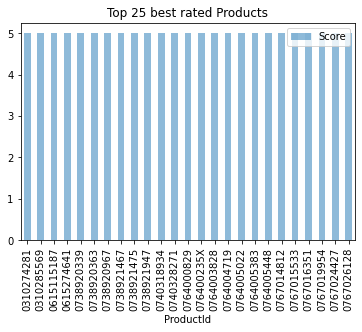

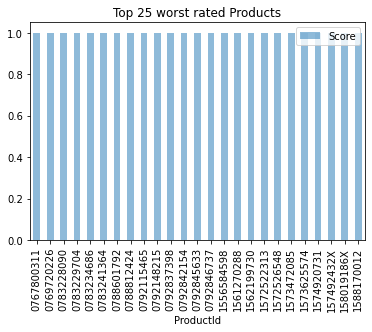

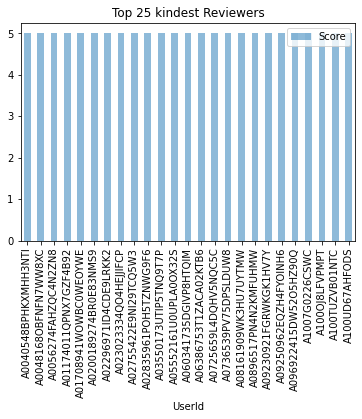

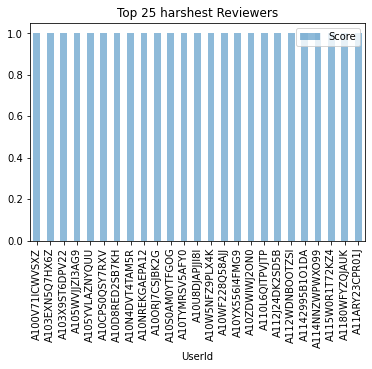

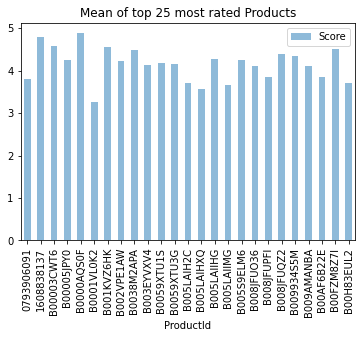

In [ ]:
from typing_extensions import dataclass_transform
data['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

data['ProductId'].value_counts().nlargest(10).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 10 most rated Products")
plt.show()

data['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

data['UserId'].value_counts().nlargest(10).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 10 Reviewers")
plt.show()

data['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

data[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

data[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

data[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

data[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

data[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

data[data['ProductId'].isin(data['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()

<Axes: title={'center': 'Scores'}>

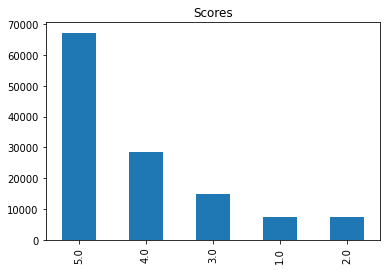

In [ ]:
import matplotlib.pyplot as plt
plt.title('Scores')
data['Score'].value_counts().plot.bar()

In [ ]:
fives = data.loc[data['Score'] == 5]
fives = fives.sample(frac=0.5)
data = pd.concat([data.loc[data['Score'] != 5], fives])

#fours=data.loc[data['Score'] == 4]
#fours = fours.sample(frac=0.8)
#data = pd.concat([data.loc[data['Score'] != 4], fours])

In [ ]:
OHE = OneHotEncoder(sparse=True)
ID = OHE.fit_transform(data[['ProductId']])

In [ ]:
data['Text'].loc[data['Text'].isna()] = ''
data['Summary'].loc[data['Summary'].isna()] = ''

In [ ]:
data = data.drop(['HelpfulnessDenominator','HelpfulnessNumerator'], axis=1)

In [ ]:
text_vectorizer = TfidfVectorizer(input='content', analyzer='word', stop_words='english')
summary_vectorizer = TfidfVectorizer(input='content', analyzer='word', stop_words='english')
text_matrix = text_vectorizer.fit_transform(data['Text'])
print(text_matrix)
summary_matrix = summary_vectorizer.fit_transform(data['Summary'])

In [ ]:
text_matrix, summary_matrix

(<106159x165362 sparse matrix of type '<class 'numpy.float64'>'
 	with 6956162 stored elements in Compressed Sparse Row format>,
 <106159x26797 sparse matrix of type '<class 'numpy.float64'>'
 	with 309291 stored elements in Compressed Sparse Row format>)

In [ ]:
X = hstack([text_matrix, summary_matrix, ID])

In [ ]:
mask = data["Score"].isnull()

ind_test = mask.to_numpy().nonzero()[0]
ind_train = (~ mask).to_numpy().nonzero()[0]
train_X = scipy.sparse.csr_matrix(X)[ind_train]
test_X = scipy.sparse.csr_matrix(X)[ind_test]

In [ ]:
train_Y = data['Score'].loc[data['Score'].isna() == False]
test_Y = data['Score'].loc[data['Score'].isna()]

train_Y = train_Y.reset_index()['Score']
test_Y = test_Y.reset_index()['Score']

In [ ]:
xgr = XGBRegressor(objective ='reg:linear',
            learning_rate = .07, #so called `eta` value
            n_estimators = 500,
            max_depth = 5,
            gamma = 0,
            min_child_weight = 3,
            subsample = 0.7,
            colsample_bytree = 0.6,
            reg_alpha = 1,
            tree_method = 'gpu_hist',
            gpu_id = 0)
xgr.fit(train_X, train_Y)
train_X=xgr.apply(train_X)
test_X=xgr.apply(test_X)

[03:05:00] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#train_Y = le.fit_transform(train_Y)
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.1, random_state=3,stratify=train_Y)

In [ ]:
eval_set = [(X_train, y_train), (X_valid, y_valid)]
params1 = {'objective':['multi:softmax'],
            'learning_rate': [0.1], #so called `eta` value
            'n_estimators': [1000],
            'max_depth': range(3,10,2),
            'gamma': [0],
            'min_child_weight': range(1,6,2),
            'subsample': [0.7],
            'colsample_bytree': [0.6],
            'reg_alpha':[1],
            'tree_method': ['gpu_hist'],
            'gpu_id': [0]}

In [ ]:
xgc = XGBClassifier()

xgb_grid = GridSearchCV(xgc, params1, cv = 3, n_jobs = 4, verbose=2)

In [ ]:
xgb_grid.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set = eval_set, verbose=True, early_stopping_rounds = 10)

xgb_grid.cv_results_['mean_test_score']
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
model = XGBClassifier(colsample_bytree = 0.6, gamma = 0, learning_rate = 0.1, max_depth = 5, min_child_weight = 3, reg_alpha = 1, subsample = 0.7, objective ='multi:softmax', tree_method = 'gpu_hist', gpu_id = 0, n_estimators = 700) # n_estimators = 2000
# model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True, early_stopping_rounds = 10)
eval_set = [(X, y), (X, y)]
model.fit(X, y, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True, early_stopping_rounds = 10)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
y_pred = model.predict(X_train)
predictions = [value=value+1 for value in y_pred]

In [ ]:
def CVKFold(k, X, y, model):
    np.random.seed(1)
    #reproducibility
    
    highest_accuracy = float('inf')
    best_model = None

    kf = StratifiedKFold(n_splits = k,shuffle =True)
    #CV loop
    
    for train_index,test_index in kf.split(X,y):#generation of the sets
    #generate the sets    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print(X_train.shape)
        print(X_test.shape)
        #model fitting
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
    
        test_accuracy = mean_squared_error(y_test_pred, y_test)
        print("The accuracy is " + str(test_accuracy))
        #if test_accuracy>0.77:
        if test_accuracy < highest_accuracy:
                best_model = model
                highest_accuracy = test_accuracy

    print("The highest accuracy is " + str(highest_accuracy))
    return best_model, highest_accuracy

In [ ]:
# Logistics Regression
h_accuracy = float('inf')
best_model = None
'''for i in range(1):
  X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.3, random_state=i+1,stratify=train_Y) '''
#print(i)
for i in range (20):
  model = LogisticRegression(random_state = 0)
#model = LinearRegression(fit_intercept = True,  copy_X=True, n_jobs = 5)
  clf_Log, accuracy_Log = CVKFold(10, train_X, train_Y, model)
  if accuracy_Log < h_accuracy:
    best_model = clf_Log
    h_accuracy = accuracy_Log
# Decision Tree
#model = DecisionTreeClassifier(random_state = 0, max_depth=20)
#clf_DTree, accuracy_DTree = CVKFold(5, train_X, train_Y, model)
# Random Forest
#model = RandomForestClassifier(random_state = 0, max_depth=20)
#clf_RF, accuracy_RF = CVKFold(5, train_X, train_Y, model)
accuracies = {h_accuracy: best_model}#, accuracy_DTree: clf_DTree, accuracy_RF: clf_RF,accuracy_Log: clf_Log
#print(accuracies)
clf = accuracies[max([h_accuracy])]
sample = pd.read_csv('/content/drive/MyDrive/506 middle/solutoion/input/sample.csv')
predict_df = pd.DataFrame(sample)

predict_df['Score'] = clf.predict(test_X)
predict_df.to_csv('/content/drive/MyDrive/506 middle/solutoion/sample_stra200.csv',index=False)

In [ ]:
accuracies = {accuracy_Log: clf_Log}#, accuracy_DTree: clf_DTree, accuracy_RF: clf_RF,accuracy_Log: clf_Log
#print(accuracies)
clf = accuracies[max([accuracy_Log])]#, accuracy_DTree, accuracy_RF
pd.options.display.max_columns=100
pd.options.display.max_rows=100
#pd.set_option('max_row',10)
#clf.coef_


In [ ]:
print(train_X)

  (0, 107237)	0.07915730709796942
  (0, 18141)	0.08462542395294488
  (0, 9149)	0.11053279403511128
  (0, 122376)	0.08879482980019517
  (0, 96148)	0.07130472790325891
  (0, 38080)	0.10163917597449003
  (0, 86891)	0.09982488108343986
  (0, 8459)	0.16039705109224564
  (0, 103515)	0.06167094425584153
  (0, 105796)	0.1157404682960342
  (0, 130011)	0.10661328174037114
  (0, 42096)	0.10249392849090118
  (0, 78011)	0.037577742520730095
  (0, 40854)	0.2138754488091445
  (0, 212)	0.17576237824737448
  (0, 57863)	0.042377293499362034
  (0, 79280)	0.17477218627110125
  (0, 57896)	0.1118159762390967
  (0, 140991)	0.13736513900684907
  (0, 119187)	0.3686098301094072
  (0, 57876)	0.09016998378840313
  (0, 76280)	0.10806499041204613
  (0, 140374)	0.0723912092796991
  (0, 132640)	0.0533813696907406
  (0, 40243)	0.049959071091533885
  :	:
  (72025, 161307)	1.0
  (72025, 173790)	-0.22641823266130665
  (72025, 173791)	-0.286379449965833
  (72025, 173792)	-0.5683711846760182
  (72025, 187328)	1.0
  (72025,

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/506 middle/solutoion/input/sample.csv')
predict_df = pd.DataFrame(sample)

predict_df['Score'] = clf.predict(test_X)
predict_df.to_csv('/content/drive/MyDrive/506 middle/solutoion/sample_xgbc.csv',index=False)